In [1]:
%matplotlib inline 

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
from matplotlib import pyplot as plt
import PIL

from datasets.ICDAR.ICDAR import IcdarMerge
from utils.visualization import create_merge_result_image
from table.markup_table import Table

In [3]:
ds = tfds.load('fin_tab_net_merge', split='train')
ds = ds.shuffle(128, seed=42)

In [4]:
def has_cell_to_merge(element):
    return tf.reduce_any(element['merge_right_mask']) or tf.reduce_any(element['merge_down_mask'])

num_of_tables_with_spanning_cells = ds.reduce(
    0, lambda state, element: state + tf.cast(has_cell_to_merge(element), tf.int32))
print('Tables with spanning cells: {}%'.format(num_of_tables_with_spanning_cells/len(ds)))

Tables with spanning cells: 0.48856304985337246%


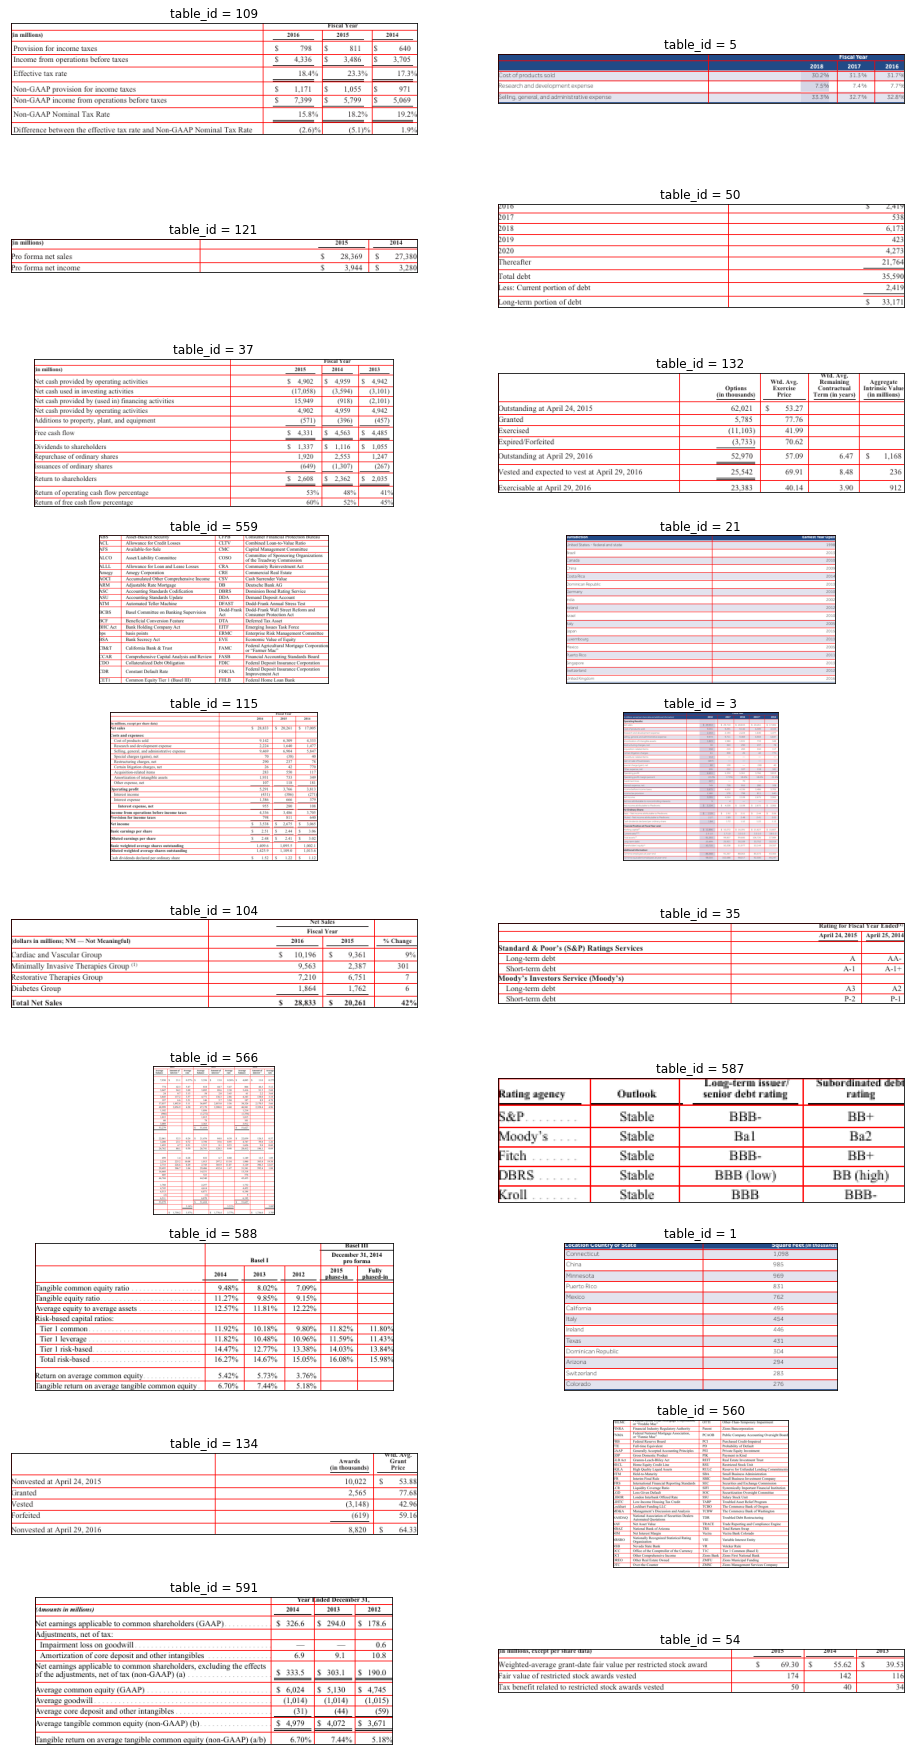

In [5]:
fig, axes = plt.subplots(10, 2, figsize=(16,32))

for element, ax in zip(ds.take(20), axes.flat):
    table_image = PIL.Image.fromarray(element['image'].numpy())
    debug_image = create_merge_result_image(
        table_image, 
        element['horz_split_points_binary'].numpy(), 
        element['vert_split_points_binary'].numpy(),
        element['merge_right_mask'].numpy(),
        element['merge_down_mask'].numpy()
    )
    table_id = Table.from_tensor(element['markup_table']).id
    ax.set_title('table_id = {}'.format(table_id))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(debug_image)
plt.show()